<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-Basics" data-toc-modified-id="Model-Basics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model Basics</a></span></li><li><span><a href="#Accessing-components-and-reading/setting-their-attributes" data-toc-modified-id="Accessing-components-and-reading/setting-their-attributes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Accessing components and reading/setting their attributes</a></span><ul class="toc-item"><li><span><a href="#Tips-and-tricks" data-toc-modified-id="Tips-and-tricks-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tips and tricks</a></span></li></ul></li><li><span><a href="#How-to-parse-an-existing-model" data-toc-modified-id="How-to-parse-an-existing-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How to parse an existing model</a></span><ul class="toc-item"><li><span><a href="#Edit-a-specific-object" data-toc-modified-id="Edit-a-specific-object-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Edit a specific object</a></span></li><li><span><a href="#Saving-edits" data-toc-modified-id="Saving-edits-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Saving edits</a></span></li></ul></li><li><span><a href="#Accessing-geometry-functions" data-toc-modified-id="Accessing-geometry-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Accessing geometry functions</a></span><ul class="toc-item"><li><span><a href="#view_model" data-toc-modified-id="view_model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>view_model</code></a></span></li><li><span><a href="#rotate" data-toc-modified-id="rotate-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>rotate</code></a></span></li><li><span><a href="#translate_to_origin" data-toc-modified-id="translate_to_origin-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><code>translate_to_origin</code></a></span></li><li><span><a href="#getsurfaces" data-toc-modified-id="getsurfaces-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span><code>getsurfaces</code></a></span></li></ul></li><li><span><a href="#Simulating-a-model" data-toc-modified-id="Simulating-a-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simulating a model</a></span><ul class="toc-item"><li><span><a href="#Model-changes-and-repeated-simulations" data-toc-modified-id="Model-changes-and-repeated-simulations-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model changes and repeated simulations</a></span></li></ul></li><li><span><a href="#Retrieving-Results" data-toc-modified-id="Retrieving-Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Retrieving Results</a></span></li></ul></div>

<!--NAVIGATION-->
< [Introduction to EnergyPlus Models Scripting](03.00-Introduction-to-EnergyPlus-Models-Scripting.ipynb) | [Contents](Index.ipynb) |

# EnergyPlus Scripting Using Archetypal

Archetypal is a scripting package that holistically approaches the creation, simulation and analysis of EnergyPlus models. It draws design concepts from other open source libraries surch as eppy and geomeppy, yet it fixes many pitfalls in an attempt to make the workflow easier and more robust.

In this Notebook, you will learn how to use `archetypal` to create new EnergyPlus models, to edit existing ones, to run a simulation and to retrieve results.

## Model Basics

In its simplest expression, archetypal defines an `IDF` class which holds all of functionality required to run an EnergyPlus model.

One simply imports the IDF class:

In [1]:
from archetypal import IDF

And can initialize an empty IDF object:

In [2]:
IDF()

<IDF object 1678cb3e-1fc8-11ed-8872-0a5c624f9c12.idf
at <_io.StringIO object at 0x7f4ed9084b80>
	Version 9.2.0
Simulation Info:
	Not yet simulated>

Looking at the string representation of the model, we can see that we created an in-memory object (identified by its location at an io.StringIO memory address. We can also see that the EnergyPlus version 9.2.0 has been used by default. This is the default value used by archetypal. One can specify a different EnergyPlus version to be used in 3 ways:

1. Specify the version as environement variable.
2. Edit the settings.ep_version module variable.
2. Specify the `as_version` attribute in the IDF constructor.

Let's go over the 3 methods.
    
To change environment variables:

(Note: For this method to work in this Notebook, one would need first to restart the Kernel and then run the following 3 cells)

In [3]:
import os

os.environ["ENERGYPLUS_VERSION"] = "9.6"

In [4]:
from archetypal import IDF

In [5]:
IDF()

<IDF object 173e8aee-1fc8-11ed-af04-0a5c624f9c12.idf
at <_io.StringIO object at 0x7f4ed32a8b80>
	Version 9.2.0
Simulation Info:
	Not yet simulated>

The second option is to change the default value in the archetypal.settings module:

In [6]:
from archetypal import settings

settings.ep_version = "9.6"

In [7]:
IDF()

<IDF object 1749abe4-1fc8-11ed-80ce-0a5c624f9c12.idf
at <_io.StringIO object at 0x7f4ed522af70>
	Version 9.6
Simulation Info:
	Not yet simulated>

The third options, and probably the best, is to simply specify the version of energyplus to be used in the constructor of the class:

In [8]:
IDF(as_version="9.6")

<IDF object 1805f5a4-1fc8-11ed-a810-0a5c624f9c12.idf
at <_io.StringIO object at 0x7f4ed297b700>
	Version 9.6
Simulation Info:
	Not yet simulated>

## Accessing components and reading/setting their attributes

The main use case for archetypal is the ability to programatically modify component attributes.

In [9]:
idf = IDF()

To access all of the Material objects in the IDF model:

In [10]:
idf.idfobjects["MATERIAL"]

[]

The output above shows that the returns list is empty, since our empty model does not have an materials in it. Let's create one.

There are different ways of adding new objects to a model:

- `IDF.newidfobject` [docs](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.newidfobject) will create a new component and add it directly to the model.
- `IDF.anidfobject` [docs](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.anidfobject) in combination with `IDF.addidfobject` [docs](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.addidfobject) and `IDF.addidfobjects` [docs](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.addidfobjects) will create a new component but will not be added to the model `IDF.addidfobject` or `IDF.addidfobjects` must be called after the object creation.

For example, we specify a new Material and its properties by passnig the `key` (or the objects Component type) as an All-Caps string "MATERIAL" and then the attributes as key-value pairs like in any python methods or functions:

In [11]:
idf.newidfobject("MATERIAL", Name="My New Material", Thickness=0.05)


MATERIAL,
    My New Material,          !- Name
    ,                         !- Roughness
    0.05,                     !- Thickness
    ,                         !- Conductivity
    ,                         !- Density
    ,                         !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance

We can verify that this object has been added by looking at the dictionary repository of objects defined in the model using the `IDF.idfobjects` property:

In [12]:
idf.idfobjects["MATERIAL"]

[
MATERIAL,
    My New Material,          !- Name
    ,                         !- Roughness
    0.05,                     !- Thickness
    ,                         !- Conductivity
    ,                         !- Density
    ,                         !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance
]

Similarly, we can delay the craetion of an object by calling `IDF.anidfobject` instead:

In [13]:
mat = idf.anidfobject(
    "MATERIAL", Name="My New Material 2", Thickness=0.05, Thermal_Absorptance=0.89
)
mat  # object has been assigned to variable `mat`


MATERIAL,
    My New Material 2,        !- Name
    ,                         !- Roughness
    0.05,                     !- Thickness
    ,                         !- Conductivity
    ,                         !- Density
    ,                         !- Specific Heat
    0.89,                     !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance

And then the object can be added to the model with:

In [14]:
idf.addidfobject(mat)


MATERIAL,
    My New Material 2,        !- Name
    ,                         !- Roughness
    0.05,                     !- Thickness
    ,                         !- Conductivity
    ,                         !- Density
    ,                         !- Specific Heat
    0.89,                     !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance

Calling again `IDF.idfobjects`, we have 2 materials in the model:

In [15]:
idf.idfobjects["MATERIAL"]

[
MATERIAL,
    My New Material,          !- Name
    ,                         !- Roughness
    0.05,                     !- Thickness
    ,                         !- Conductivity
    ,                         !- Density
    ,                         !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance
, 
MATERIAL,
    My New Material 2,        !- Name
    ,                         !- Roughness
    0.05,                     !- Thickness
    ,                         !- Conductivity
    ,                         !- Density
    ,                         !- Specific Heat
    0.89,                     !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance
]

### Tips and tricks

Granted it can be hard to know what are the attribute names of a component especially since EnergyPlus has a huge list of components to choose from.

One trick is to call the creation of an object with it's default value and to call the `dict` methdod to return the atribute names:

In [16]:
idf.anidfobject("MATERIAL:NOMASS").to_dict()

{'key': 'MATERIAL:NOMASS',
 'Name': '',
 'Roughness': '',
 'Thermal_Resistance': '',
 'Thermal_Absorptance': 0.9,
 'Solar_Absorptance': 0.7,
 'Visible_Absorptance': 0.7}

You would then copy the dictionary above in a cell and make changes to the attribute values as such:

In [17]:
idf.anidfobject("MATERIAL:NOMASS").getfieldidd("Roughness")

{'field': ['Roughness'],
 'required-field': [''],
 'type': ['choice'],
 'key': ['VeryRough',
  'Rough',
  'MediumRough',
  'MediumSmooth',
  'Smooth',
  'VerySmooth']}

In [18]:
mat_dict = {
    "key": "MATERIAL:NOMASS",
    "Name": "My NoMass material",
    "Roughness": "",
    "Thermal_Resistance": "",
    "Thermal_Absorptance": 0.9,
    "Solar_Absorptance": 0.7,
    "Visible_Absorptance": 0.7,
}

But what is "**Roughness**"! And what are the valid values that EnergyPlus will accept? We could go to the EnergyPlus online documentation for the Material:NoMass class and fetch the info there, but there is an easier option:

Thankfully, `eppy` has done some heavylifting behind the scene and has parsed all of the content of the EnergyPlus IDD file which holds the recipy book for all the EnergyPlus component in a specific EnergyPlus version.

One can retrieve this IDD information for any fieldname by calling `EPBunch.getfield(<fieldname>)`.

<div class="alert alert-block alert-info">
<b>Sidenote:</b> the components in an IDF model are of a special type of class called an `EPBunch`.
</div>

In [19]:
idf.anidfobject("MATERIAL:NOMASS").getfieldidd("Roughness")

{'field': ['Roughness'],
 'required-field': [''],
 'type': ['choice'],
 'key': ['VeryRough',
  'Rough',
  'MediumRough',
  'MediumSmooth',
  'Smooth',
  'VerySmooth']}

The information above tells me that the field "Roughness" is not a "required-field" (it can be left empty), and that the choices are on off ['VeryRough',  'Rough',  'MediumRough',  'MediumSmooth',  'Smooth',  'VerySmooth']:

So I can continue edition my dictionary with the required Roughness:

In [20]:
mat_dict = {
    "key": "MATERIAL:NOMASS",
    "Name": "My NoMass material",
    "Roughness": "Smooth",
    "Thermal_Resistance": "",
    "Thermal_Absorptance": 0.9,
    "Solar_Absorptance": 0.7,
    "Visible_Absorptance": 0.7,
}

Finally, I can create the new material object using the dictionary and python's special double-star (**) syntax which will unpack the key-values of the dictionary as paramters of the `newidfobject` method: 

In [21]:
idf.newidfobject(**mat_dict)


MATERIAL:NOMASS,
    My NoMass material,       !- Name
    Smooth,                   !- Roughness
    ,                         !- Thermal Resistance
    0.9,                      !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance

## How to parse an existing model

In [22]:
idf = IDF("seed_file_V960.idf")

In [23]:
idf.idfobjects["MATERIAL"]

[
Material,
    8IN CONCRETE HW,          !- Name
    MediumRough,              !- Roughness
    0.2033,                   !- Thickness
    1.72959999999999,         !- Conductivity
    2242.99999999999,         !- Density
    836.999999999999,         !- Specific Heat
    0.87,                     !- Thermal Absorptance
    0.65,                     !- Solar Absorptance
    0.7;                      !- Visible Absorptance
, 
Material,
    ATTICFLOOR INSULATION R-45.65 IP,    !- Name
    MediumRough,              !- Roughness
    0.393911555076,           !- Thickness
    0.049,                    !- Conductivity
    265,                      !- Density
    836.800000000001,         !- Specific Heat
    0.9,                      !- Thermal Absorptance
    0.7,                      !- Solar Absorptance
    0.7;                      !- Visible Absorptance
, 
Material,
    G01a 19mm gypsum board,    !- Name
    MediumSmooth,             !- Roughness
    0.019,                    !- Thickn

### Edit a specific object

In [24]:
mat_concrete = idf.getobject("MATERIAL", "8IN CONCRETE HW")
mat_concrete


Material,
    8IN CONCRETE HW,          !- Name
    MediumRough,              !- Roughness
    0.2033,                   !- Thickness
    1.72959999999999,         !- Conductivity
    2242.99999999999,         !- Density
    836.999999999999,         !- Specific Heat
    0.87,                     !- Thermal Absorptance
    0.65,                     !- Solar Absorptance
    0.7;                      !- Visible Absorptance

In [25]:
mat_concrete.Thermal_Absorptance

0.87

In [26]:
mat_concrete.Thermal_Absorptance = 0.87

In [27]:
mat_concrete


Material,
    8IN CONCRETE HW,          !- Name
    MediumRough,              !- Roughness
    0.2033,                   !- Thickness
    1.72959999999999,         !- Conductivity
    2242.99999999999,         !- Density
    836.999999999999,         !- Specific Heat
    0.87,                     !- Thermal Absorptance
    0.65,                     !- Solar Absorptance
    0.7;                      !- Visible Absorptance

### Saving edits

The IDF object has a property called `filename`. This is used to point to a filepath on the system where the object will be written.

In [28]:
idf.idfname

Path('seed_file_V960.idf')

This property has been set by the constructor `IDF()` used above with the value `seed_file_V960.idf`. If we call the IDF.save() method, this will overwrite the contents of the file:

In [29]:
idf.save()

<IDF object seed_file_V960.idf
at seed_file_V960.idf
	Version 9.6
Simulation Info:
	Not yet simulated>

If we made edits and would rather not overwrite the content of the file, but create a new file, then we would use the `IDF.saveas()` method and specify a different path to the file we would like to create.

In [30]:
idf.saveas("seed_file_V960_edited.idf")

<IDF object seed_file_V960.idf
at seed_file_V960_edited.idf
	Version 9.6
Simulation Info:
	Not yet simulated>

<div class="alert alert-block alert-info">
<b>Important:</b> Note that IDF.saveas does not mutate (or modify) the object, meaning that `idf` still refers to the previous file location. With IDF.saveas(), a new IDF object is created (pointing to the new path) and it is returned; This is what we see in the output of the cell above. We can instead mutate the object by calling idf.saveas("seed_file_V960_edited.idf", inplace=True), essentially replacing the reference to `seed_file_V960.idf` with `seed_file_V960_edited.idf` inplace.
</div>

saveas can be used to create a new object:

In [31]:
new_idf = idf.saveas("seed_file_V960_edited.idf")

In [32]:
idf.idfname != new_idf.idfname

True

Or to mutate the current object inplace:

In [33]:
idf.saveas("seed_file_V960_edited.idf", inplace=True)

In [34]:
idf.idfname == new_idf.idfname

True

## Accessing geometry functions

The IDF class exposes methods regarding the geometry of the file thanks to the `geomeppy` package.

Here are some common methods worth knowing:


- [IDF.view_model()](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.view_model)
- [IDF.rotate()](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.rotate)
- [IDF.translate()](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.translate)
- [IDF.translate_to_origin()](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.translate_to_origin)
- [IDF.getsurfaces()](https://archetypal.readthedocs.io/en/stable/reference/archetypal.idfclass.IDF.html#archetypal.idfclass.IDF.getsurfaces)

### `view_model`

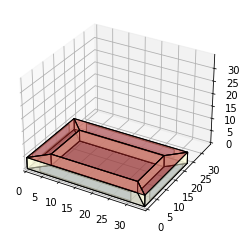

In [35]:
idf.view_model()

### `rotate`

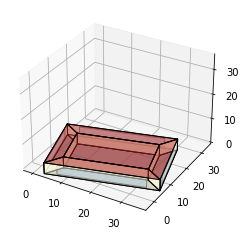

In [36]:
idf.rotate(15)
idf.view_model()

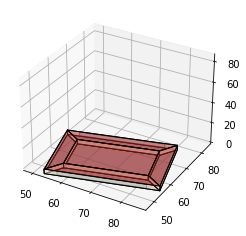

In [37]:
idf.translate((50,50, 0))
idf.view_model()

### `translate_to_origin`

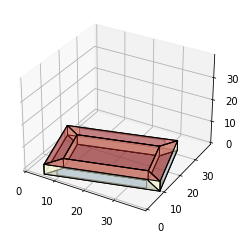

In [38]:
idf.translate_to_origin()
idf.view_model()

### `getsurfaces`

Retrieves surfaces (walls, Floor, Roof, etc.) for all or a certain type:

In [39]:
idf.getsurfaces()

[
 BuildingSurface:Detailed,
     zone_5_Srf_0,             !- Name
     Wall,                     !- Surface Type
     Interior Wall,            !- Construction Name
     zone_5,                   !- Zone Name
     ,                         !- Space Name
     Surface,                  !- Outside Boundary Condition
     zone_7_Srf_2,             !- Outside Boundary Condition Object
     NoSun,                    !- Sun Exposure
     NoWind,                   !- Wind Exposure
     ,                         !- View Factor to Ground
     ,                         !- Number of Vertices
     30.335646393834168,       !- Vertex 1 Xcoordinate
     25.685963145907166,       !- Vertex 1 Ycoordinate
     4.5,                      !- Vertex 1 Zcoordinate
     30.335646393834168,       !- Vertex 2 Xcoordinate
     25.685963145907166,       !- Vertex 2 Ycoordinate
     0,                        !- Vertex 2 Zcoordinate
     5.511351921262147,        !- Vertex 3 Xcoordinate
     19.034313489309113,  

In [40]:
idf.getsurfaces("Wall")

[
 BuildingSurface:Detailed,
     zone_5_Srf_0,             !- Name
     Wall,                     !- Surface Type
     Interior Wall,            !- Construction Name
     zone_5,                   !- Zone Name
     ,                         !- Space Name
     Surface,                  !- Outside Boundary Condition
     zone_7_Srf_2,             !- Outside Boundary Condition Object
     NoSun,                    !- Sun Exposure
     NoWind,                   !- Wind Exposure
     ,                         !- View Factor to Ground
     ,                         !- Number of Vertices
     30.335646393834168,       !- Vertex 1 Xcoordinate
     25.685963145907166,       !- Vertex 1 Ycoordinate
     4.5,                      !- Vertex 1 Zcoordinate
     30.335646393834168,       !- Vertex 2 Xcoordinate
     25.685963145907166,       !- Vertex 2 Ycoordinate
     0,                        !- Vertex 2 Zcoordinate
     5.511351921262147,        !- Vertex 3 Xcoordinate
     19.034313489309113,  

Here is how we could get all the Surface Types used in the model:

In [41]:
list_of_surfaces = []
for surface in idf.getsurfaces():
    list_of_surfaces.append(surface.Surface_Type)

set(list_of_surfaces)

{'Floor', 'Roof', 'Wall'}

In [42]:
roofs = idf.getsurfaces("Roof")

floors = idf.getsurfaces("Floor")

walls = idf.getsurfaces("Wall")

For each surface, other methods area available:

- coords
- area
- azimuth
- height
- tilt

In [43]:
roofs[0].coords

[(33.95911302526946, 12.163001577860207, 4.5),
 (30.335646393834168, 25.685963145907166, 4.5),
 (5.511351921262147, 19.034313489309113, 4.5),
 (9.134818552697439, 5.511351921262147, 4.5)]

In [44]:
roofs[0].area

359.80001068115314

In [45]:
roofs[0].azimuth

0.0

In [46]:
roofs[0].height

14.000000000000004

In [47]:
roofs[0].tilt

0.0

For more information about geometry functions, visit [geomeppy](https://geomeppy.readthedocs.io/en/latest/?)

In [48]:
wall_1 = walls[0]

In [49]:
wall_1


BuildingSurface:Detailed,
    zone_5_Srf_0,             !- Name
    Wall,                     !- Surface Type
    Interior Wall,            !- Construction Name
    zone_5,                   !- Zone Name
    ,                         !- Space Name
    Surface,                  !- Outside Boundary Condition
    zone_7_Srf_2,             !- Outside Boundary Condition Object
    NoSun,                    !- Sun Exposure
    NoWind,                   !- Wind Exposure
    ,                         !- View Factor to Ground
    ,                         !- Number of Vertices
    30.335646393834168,       !- Vertex 1 Xcoordinate
    25.685963145907166,       !- Vertex 1 Ycoordinate
    4.5,                      !- Vertex 1 Zcoordinate
    30.335646393834168,       !- Vertex 2 Xcoordinate
    25.685963145907166,       !- Vertex 2 Ycoordinate
    0,                        !- Vertex 2 Zcoordinate
    5.511351921262147,        !- Vertex 3 Xcoordinate
    19.034313489309113,       !- Vertex 3 Ycoo

In [50]:
contruction = wall_1.get_referenced_object("Construction_Name")

In [51]:
contruction


Construction,
    Interior Wall,            !- Name
    G01a 19mm gypsum board,    !- Outside Layer
    Material Air Gap 1,       !- Layer 2
    G01a 19mm gypsum board;    !- Layer 3

In [52]:
contruction.fieldnames

['key',
 'Name',
 'Outside_Layer',
 'Layer_2',
 'Layer_3',
 'Layer_4',
 'Layer_5',
 'Layer_6',
 'Layer_7',
 'Layer_8',
 'Layer_9',
 'Layer_10']

In [53]:
mat_of_construction = []
for n in contruction.fieldnames:
    if n == "key" or n == "Name":
        pass
    else:
        print(n)
        mat = contruction.get_referenced_object(n)
        if mat is None:
            continue
        mat_of_construction.append(mat)

Outside_Layer
Layer_2
Layer_3
Layer_4
Layer_5
Layer_6
Layer_7
Layer_8
Layer_9
Layer_10


In [54]:
mat_of_construction

[
 Material,
     G01a 19mm gypsum board,    !- Name
     MediumSmooth,             !- Roughness
     0.019,                    !- Thickness
     0.16,                     !- Conductivity
     800,                      !- Density
     1090,                     !- Specific Heat
     0.9,                      !- Thermal Absorptance
     0.7,                      !- Solar Absorptance
     0.7;                      !- Visible Absorptance,
 
 Material:AirGap,
     Material Air Gap 1,       !- Name
     0.15;                     !- Thermal Resistance,
 
 Material,
     G01a 19mm gypsum board,    !- Name
     MediumSmooth,             !- Roughness
     0.019,                    !- Thickness
     0.16,                     !- Conductivity
     800,                      !- Density
     1090,                     !- Specific Heat
     0.9,                      !- Thermal Absorptance
     0.7,                      !- Solar Absorptance
     0.7;                      !- Visible Absorptance]

In [55]:
sum(
    list(
        map(
            lambda mat: mat.Thickness if mat.key.upper() == "MATERIAL" else 0,
            mat_of_construction,
        )
    )
)

0.038

## Simulating a model

### Model changes and repeated simulations

Describe how once a model has been simulated it will not simulate a again unless simulation parameters have changed or if the model content has changed

## Retrieving Results

<!--NAVIGATION-->
< [Introduction to EnergyPlus Models Scripting](03.00-Introduction-to-EnergyPlus-Models-Scripting.ipynb) | [Contents](Index.ipynb) |